In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("gaiaDataNearSun.csv")

In [4]:
df = df.loc[df.parallax > 0, :]

In [5]:
df['distance'] = 1.0/df.parallax

In [6]:
df.columns

Index(['parallax', 'l', 'b', 'distance'], dtype='object')

In [7]:
df['distance'] = 1.0 / (df['parallax'] / 1000.0)

# Convert heliocentric longitude and latitude to radians
df['l_rad'] = np.radians(df['l'])
df['b_rad'] = np.radians(df['b'])

# Set the Galactic center longitude (you may adjust this as needed)
galactic_center_longitude_rad = np.radians(0.0)

# Calculate azimuthal angle (Phi) in radians
df['phi'] = df['l_rad'] - galactic_center_longitude_rad

# Calculate X, Y, and Z based on distance, longitude, and latitude
df['X'] = df['distance'] * np.cos(df['b_rad']) * np.cos(df['l_rad'] - galactic_center_longitude_rad)
df['Y'] = df['distance'] * np.cos(df['b_rad']) * np.sin(df['l_rad'] - galactic_center_longitude_rad)
df['Z'] = df['distance'] * np.sin(df['b_rad'])

# Calculate R (distance from Galactic center) from X and Y
df['R'] = np.sqrt(df['X']**2 + df['Y']**2)

In [8]:
df.columns

Index(['parallax', 'l', 'b', 'distance', 'l_rad', 'b_rad', 'phi', 'X', 'Y',
       'Z', 'R'],
      dtype='object')

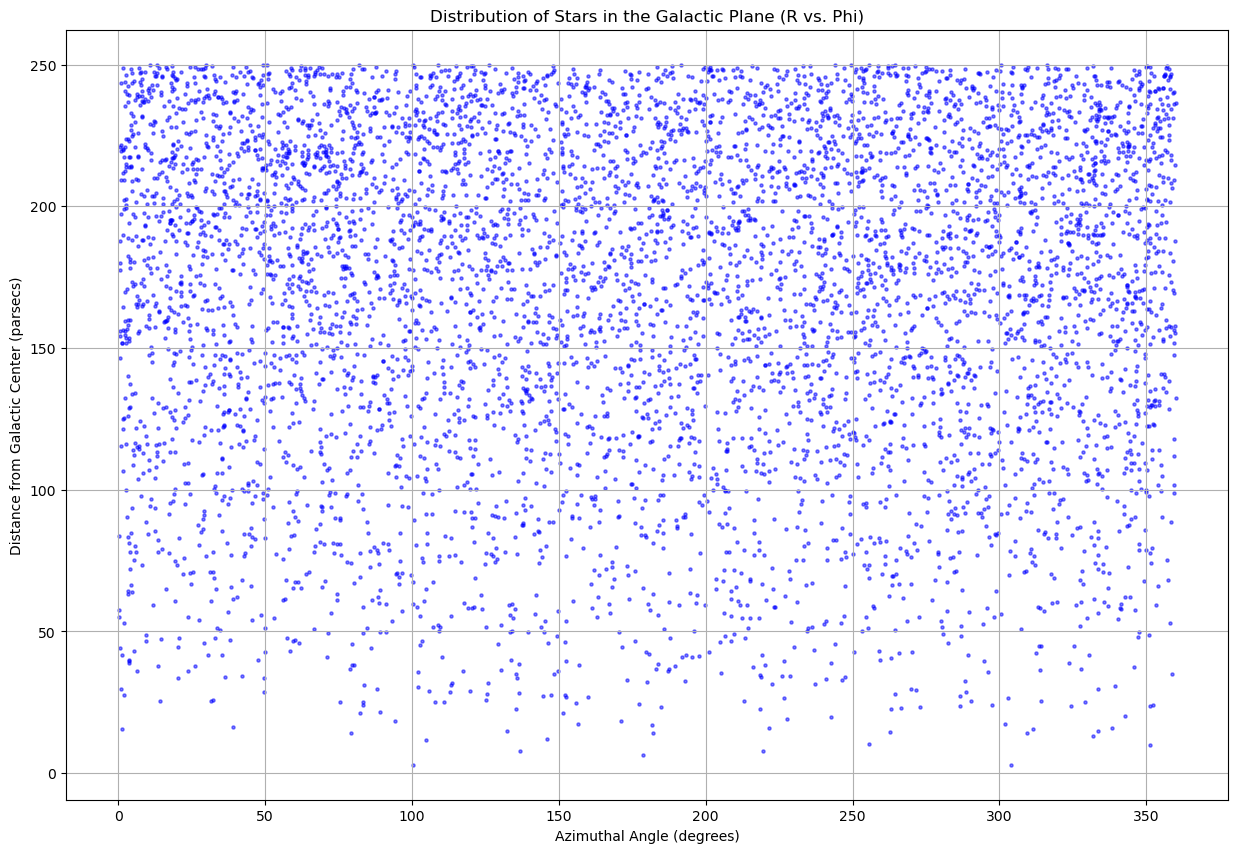

In [9]:
R_data = df['R']
Phi_data = np.degrees(df['phi'])  # Convert radians to degrees

# Create a 2D scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(Phi_data, R_data, s=5, c='b', alpha=0.5)
plt.xlabel('Azimuthal Angle (degrees)')
plt.ylabel('Distance from Galactic Center (parsecs)')
plt.title('Distribution of Stars in the Galactic Plane (R vs. Phi)')
plt.grid(True)
plt.show()

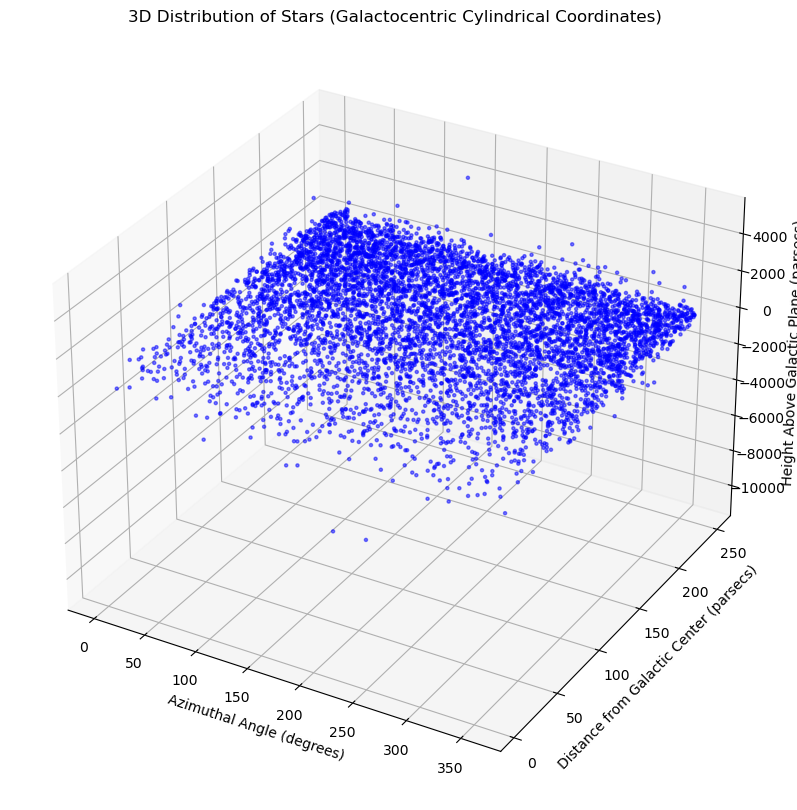

In [10]:
R_data = df['R']
Phi_data = np.degrees(df['phi'])  # Convert radians to degrees
Z_data = df['Z']

# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Phi_data, R_data, Z_data, s=5, c='b', marker='o', alpha=0.5)
ax.set_xlabel('Azimuthal Angle (degrees)')
ax.set_ylabel('Distance from Galactic Center (parsecs)')
ax.set_zlabel('Height Above Galactic Plane (parsecs)')
ax.set_title('3D Distribution of Stars (Galactocentric Cylindrical Coordinates)')
plt.show()

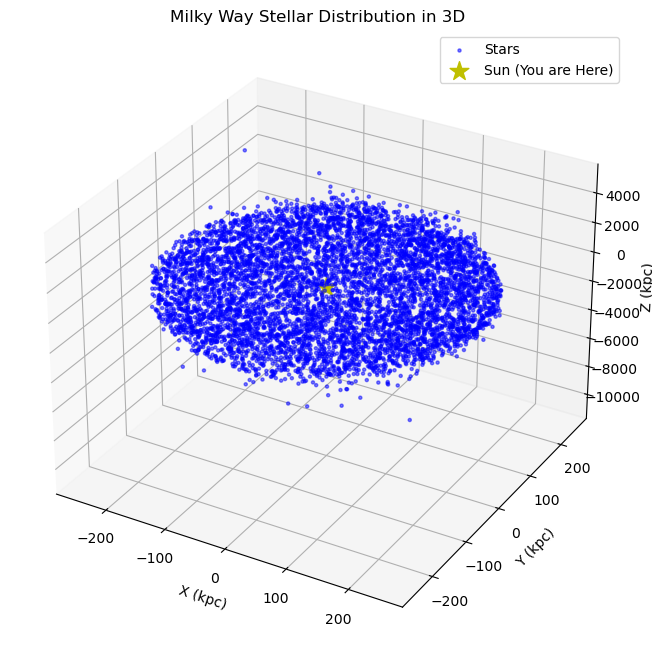

In [11]:
from mpl_toolkits.mplot3d import Axes3D



# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the stars' Galactocentric coordinates
ax.scatter(df['X'], df['Y'], df['Z'], c='b', s=5, alpha=0.5, label='Stars')

# Add the positions of the Sun and Earth
ax.scatter(0, 0, 0, c='y', marker='*', s=200, label='Sun (You are Here)')  # The Sun at the Galactic center
 

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('Milky Way Stellar Distribution in 3D')
ax.legend()

plt.show()

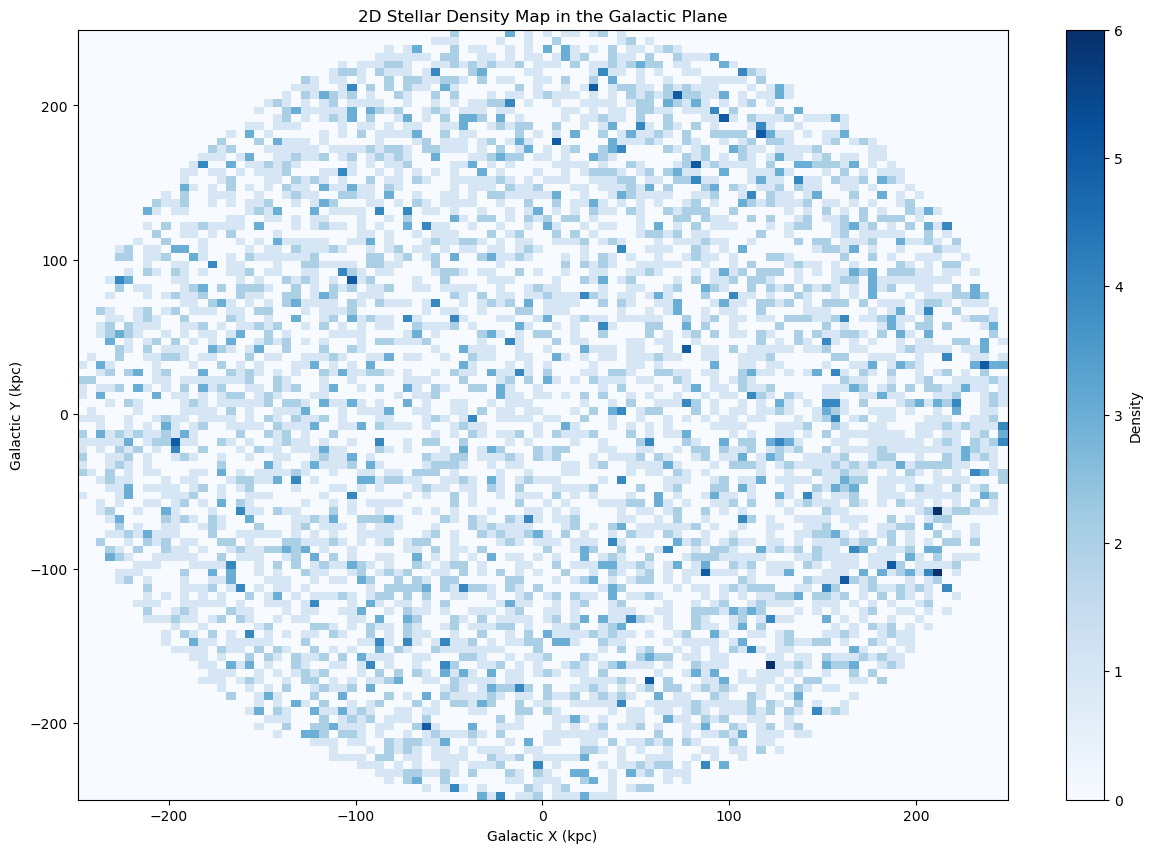

In [12]:
galactic_X = df['X']
galactic_Y = df['Y']

# Create a 2D density map using plt.hist2d()
plt.figure(figsize=(15, 10))
plt.hist2d(galactic_X, galactic_Y, bins=(100, 100), cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Galactic X (kpc)')
plt.ylabel('Galactic Y (kpc)')
plt.title('2D Stellar Density Map in the Galactic Plane')
plt.show()

In [ ]:
parallax: Parallax measurements provide information about the distance to stars. You can use this column to:

l (longitude): Heliocentric longitude provides the angular position of stars within the Milky Way. You can use this column to:

b (latitude): Heliocentric latitude represents the angle above or below the Galactic plane. You can use this column to:

distance: The calculated distance to stars based on parallax measurements. You can use this column to:

l_rad: Heliocentric longitude converted to radians. This column simplifies trigonometric calculations and is useful for creating visualizations based on angular positions.

b_rad: Heliocentric latitude converted to radians. Similar to l_rad, this column simplifies trigonometric calculations.

phi: Azimuthal angle calculated relative to the Galactic center. You can use this column to:

Z: Height above the Galactic plane. This column provides information about stars' positions above or below the Galactic mid-plane.

X, Y, R: These columns represent the Galactocentric rectangular coordinates (X, Y, Z) and cylindrical coordinates (R, Phi, Z) of stars. You can use these columns to: